In [8]:
import numpy as np

def trapezoidal(f, a, b, n):
    h = float(b - a)/n
    x = np.linspace(a, b, n + 1)

    s = sum(f(x)) - 0.5*f(a) - 0.5*f(b)
    
    return h*s

def midpoint(f, a, b, n):
    h = float(b - a)/n
    x = np.linspace(a + h/2, b - h/2, n)
        
    return h*sum(f(x))

In [6]:
# Ej 3.1

def test_trapezoidal():
    def f(x):
        return 2*x**3
    a = 1;  b = 3
    n = 2
    numerical = trapezoidal(f, a, b, n)
    hand = 44.0
    error = abs(numerical - hand)
    tol = 1E-14
    assert error < tol, error 
    
test_trapezoidal()

In [9]:
# Ej 3.2

def test_midpoint():
    def f(x):
        return 2*x**3
    a = 1;  b = 3; 
    n = 2
    numerical = midpoint(f, a, b, n)
    hand = 38.0
    error = abs(numerical - hand)
    tol = 1E-14
    assert error < tol, error 
    
test_midpoint()

In [71]:
# Ej 3.3

def f(x):
    return x*(x - 1)

expected = 160/3

print('Intervals\t\tTrapezoidal\t\tErrorT\t\t\tMidpoint\t\tErrorM')

for i in range(2,101):
    t = trapezoidal(f, 2, 6, i)
    m = midpoint(f, 2, 6, i)
    et = abs(expected - t)
    em = abs(expected - m)
    
    print('{i:5d}\t\t{f:.16f}\t{g:.16f}\t{h:.16f}\t{k:.16f}'.format(i = i, f = t, g = et, h = m, k = em))

Intervals		Trapezoidal		ErrorT			Midpoint		ErrorM
    2		56.0000000000000000	2.6666666666666643	52.0000000000000000	1.3333333333333357
    3		54.5185185185185119	1.1851851851851762	52.7407407407407334	0.5925925925926023
    4		54.0000000000000000	0.6666666666666643	53.0000000000000000	0.3333333333333357
    5		53.7600000000000051	0.4266666666666694	53.1200000000000045	0.2133333333333312
    6		53.6296296296296191	0.2962962962962834	53.1851851851851904	0.1481481481481453
    7		53.5510204081632608	0.2176870748299251	53.2244897959183731	0.1088435374149626
    8		53.5000000000000000	0.1666666666666643	53.2500000000000000	0.0833333333333357
    9		53.4650205761316784	0.1316872427983427	53.2674897119341537	0.0658436213991820
   10		53.4399999999999977	0.1066666666666620	53.2800000000000082	0.0533333333333275
   11		53.4214876033057848	0.0881542699724491	53.2892561983471040	0.0440771349862317
   12		53.4074074074073977	0.0740740740740620	53.2962962962962834	0.0370370370370523
   13		53.39644

In [76]:
# Ej 3.4

import numpy as np

def f(x):
    return np.sin(x)

expected1 = 2
expected2 = 0
b1 = np.pi
b2 = 2*np.pi

print('b\t\tTrapezoidal\t\tErrorT\t\t\tMidpoint\t\tErrorM')

t = trapezoidal(f, 0, b1, 2)
m = midpoint(f, 0, b1, 2)
et = abs(expected1 - t)
em = abs(expected1 - m)

t2 = trapezoidal(f, 0, b2, 2)
m2 = midpoint(f, 0, b2, 2)
et2 = abs(expected2 - t2)
em2 = abs(expected2 - m2)
    
print('{i:.5f}\t\t{f:.16f}\t{g:.16f}\t{h:.16f}\t{k:.16f}'.format(i = b1, f = t, g = et, h = m, k = em))
print('{i:.5f}\t\t{f:.16f}\t{g:.16f}\t{h:.16f}\t{k:.16f}'.format(i = b2, f = t2, g = et2, h = m2, k = em2))

b		Trapezoidal		ErrorT			Midpoint		ErrorM
3.14159		1.5707963267948970	0.4292036732051030	2.2214414690791831	0.2214414690791831
6.28319		0.0000000000000000	0.0000000000000000	0.0000000000000000	0.0000000000000000


In [12]:
# Ej 3.5

def test_midpoint_one_exact_result():
    """Compare one hand-computed result."""
    from math import exp
    v = lambda t: 3*(t**2)*exp(t**3)
    n = 2
    numerical = midpoint(v, 0, 1, n)
    exact = 1.3817914596908085
    err = abs(exact - numerical)
    tol = 1E-14
    assert err < tol, err

def test_midpoint_linear():
    """Check that linear functions are integrated exactly"""
    # ...they should, since errros from each rectangle cancel
    f = lambda x: 6*x - 4
    F = lambda x: 3*x**2 - 4*x  # Anti-derivative
    a = 1.2;  b = 4.4
    exact = F(b) - F(a)
    tol = 1E-14
    for n in 2, 20, 21:
        numerical = midpoint(f, a, b, n)
        err = abs(exact - numerical)
        assert err < tol, 'n = %d, err = %g' % (n,err)

def test_midpoint_conv_rate():
    """Check empirical convergence rates against the expected -2."""
    from math import exp
    v = lambda t: 3*(t**2)*exp(t**3)
    V = lambda t: exp(t**3)
    a = 1.1;  b = 1.9
    r = convergence_rates(v, V, a, b, 14)
    print(r)
    tol = 0.01
    assert (abs(r[-1]) - 2) < tol, r[-4:]
    
def convergence_rates(f, F, a, b, num_experiments=14):
    from math import log
    from numpy import zeros
    exact = F(b) - F(a)
    n = zeros(num_experiments, dtype=int)
    E = zeros(num_experiments)
    r = zeros(num_experiments-1)
    for i in range(num_experiments):
        n[i] = 2**(i+1)
        numerical = midpoint(f, a, b, n[i])
        E[i] = abs(exact - numerical)
        if i > 0:
            r_im1 = log(E[i]/E[i-1])/log(float(n[i])/n[i-1])
            r[i-1] = float('%.2f' % r_im1)  # Truncate, two decimals
    return r
        
#test_midpoint_one_exact_result()
test_midpoint_linear()
#test_midpoint_conv_rate()

In [13]:
# Ej 3.6

def test_trapezoidal_linear_scale():
    """Check that linear functions are integrated exactly"""
    f = lambda x: 6E8*x - 4E6
    F = lambda x: 3E8*x**2 - 4E6*x  # Anti-derivative
    #a = 1.2;  b = 4.4
    a = 1.2/6E8;  b = 4.4/6E8       # Scale interval down
    exact = F(b) - F(a)
    tol = 1E-14
    for n in 2, 20, 21:
        numerical = trapezoidal(f, a, b, n)
        err = abs(exact - numerical)
        msg = 'n = %d, err = %g' % (n, err)
        assert err < tol, msg
        print(msg)

In [14]:
# Ej 3.7

def test_trapezoidal_one_exact_result():
    """Compare one hand-computed result."""
    f = lambda x: x**0.5
    tol = 1E-14
    exact = [4.82842712474619, 5.050258266979605] # n=2, n=3
    for n in [2, 3]:
        numerical = trapezoidal(f, 0, 4, n)
        err = abs(exact[n-2] - numerical)
        assert err < tol, err

def test_trapezoidal_conv_rate():
    """Check empirical convergence rates against the expected -2."""
    from math import exp
    f = lambda x: x**0.5
    F = lambda x: (2.0/3)*x**(3.0/2)
    a = 0.0 + 0.1;  b = 4.0         # a adjusted by 0.1
    r = convergence_rates(f, F, a, b, 14)
    print(r)
    tol = 0.01
    assert abs(abs(r[-1]) - 2) < tol, r[-4:]
    
def convergence_rates(f, F, a, b, num_experiments=14):
    from math import log
    from numpy import zeros
    exact = F(b) - F(a)
    n = zeros(num_experiments, dtype=int)
    E = zeros(num_experiments)
    r = zeros(num_experiments-1)
    for i in range(num_experiments):
        n[i] = 2**(i+1)
        numerical = trapezoidal(f, a, b, n[i])
        E[i] = abs(exact - numerical)
        if i > 0:
            r_im1 = log(E[i]/E[i-1])/log(float(n[i])/n[i-1])
            r[i-1] = float('%.2f' % r_im1)  # Truncate to two decimals
    return r

test_trapezoidal_one_exact_result()
test_trapezoidal_conv_rate()

[-1.7  -1.8  -1.89 -1.95 -1.98 -1.99 -2.   -2.   -2.   -2.   -2.   -2.   -2.  ]


In [16]:
# Ej 3.8

def rectangle(f, a, b, n, height='left'):
    """Uses a rectangle method for integrating f. The height of
    each rectangle is computed either at the left end, middle or 
    right end of each sub-interval"""
    h = float(b-a)/n
    if height == 'left':
        start = a
    elif height == 'mid':
        start = a + h/2.0
    else:      # Must be right end
        start = a + h
    result = 0
    for i in range(n):
        result += f((start) + i*h)
    result *= h
    return result

def test_rectangle_one_exact_result():
    """Compare one hand-computed result."""
    from math import exp
    v = lambda t: 3*(t**2)*exp(t**3)
    method = ['left', 'mid', 'right']
    n = 2
    exact = [0.4249306699000599, 1.3817914596908085, \
                                           4.5023534125886275]
    tol = 1E-14
    for i in range(len(method)):
        numerical = rectangle(v, 0, 1, n, method[i])
        err = abs(exact[i] - numerical)
        assert err < tol, err

def test_rectangle_linear():
    """Check that linear functions are integrated exactly 
    (with midpoint) or with a known correctable error (left 
    and right)"""
    method = ['left', 'mid', 'right']
    f = lambda x: 6*x - 4
    slope = 6
    F = lambda x: 3*x**2 - 4*x  # Anti-derivative
    # From the slope of f (i.e. 6), we know that left will 
    # under-estimate the inegral by C (given below), while
    # right will over-estimate by C
    a = 1.2;  b = 4.4
    exact = F(b) - F(a)
    #tol = 1E-14
    tol = 1E-13        # Slightly relaxed compared to previously
    for n in 2, 20, 21:
        h = float(b-a)/n
        C = n*(0.5*slope*h**2)    # Correction term for left/right
        for i in range(len(method)):
            numerical = rectangle(f, a, b, n, method[i])
            if (method[i] == 'left'):
                numerical += C
            elif (method[i] == 'right'):
                numerical -= C
            err = abs(exact - numerical)
            assert err < tol, 'n = %d, err = %g' % (n,err)

def test_rectangle_conv_rate():
    """Check empirical convergence rates against the expected rate,
    which is -2 for midpoint and -1 for left and right."""
    from math import exp
    method = ['left', 'mid', 'right']
    v = lambda t: 3*(t**2)*exp(t**3)
    V = lambda t: exp(t**3)
    a = 1.1;  b = 1.9
    tol = 0.01
    for i in range(len(method)):
        r = convergence_rates(v, V, a, b, method[i], 14)
        print(r)
        if (method[i] == 'left') or (method[i] == 'right'):
            assert abs(abs(r[-1]) - 1) < tol, r[-4:]
        else:
            assert abs(abs(r[-1]) - 2) < tol, r[-4:]            
    
def convergence_rates(f, F, a, b, height, num_experiments=14):
    from math import log
    from numpy import zeros
    exact = F(b) - F(a)
    n = zeros(num_experiments, dtype=int)
    E = zeros(num_experiments)
    r = zeros(num_experiments-1)
    for i in range(num_experiments):
        n[i] = 2**(i+1)
        numerical = rectangle(f, a, b, n[i], height)
        E[i] = abs(exact - numerical)
        if i > 0:
            r_im1 = log(E[i]/E[i-1])/log(float(n[i])/n[i-1])
            r[i-1] = float('%.2f' % r_im1)  # Truncate to two decimals
    return r
        
test_rectangle_one_exact_result()
test_rectangle_linear()
test_rectangle_conv_rate()

[-0.39 -0.67 -0.84 -0.92 -0.96 -0.98 -0.99 -1.   -1.   -1.   -1.   -1.   -1.  ]
[-1.43 -1.81 -1.95 -1.99 -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.  ]
[-1.22 -1.19 -1.12 -1.07 -1.03 -1.02 -1.01 -1.   -1.   -1.   -1.   -1.   -1.  ]


midpoint diff:  0.123134359375
midpoint diff:  0.123134359375
midpoint diff:  0.0307835898438
midpoint diff:  0.00769589746094
midpoint diff:  0.00192397436523
midpoint diff:  0.000480993591308
midpoint diff:  0.000120248397828
midpoint diff:  3.0062099456e-05
midpoint diff:  7.51552486511e-06
midpoint diff:  1.8788812155e-06
midpoint diff:  4.69720306651e-07
midpoint diff:  1.17430072777e-07
midpoint diff:  2.93575195265e-08
midpoint diff:  7.3393797706e-09
midpoint diff:  1.83484427652e-09
midpoint diff:  4.58663773628e-10
midpoint diff:  1.14799281192e-10
midpoint diff:  2.86588530685e-11
The integral computes to:  2.66666633332
Sufficient n is: 262144
trapezoidal diff:  0.24626871875
trapezoidal diff:  0.24626871875
trapezoidal diff:  0.0615671796875
trapezoidal diff:  0.0153917949219
trapezoidal diff:  0.00384794873047
trapezoidal diff:  0.000961987182618
trapezoidal diff:  0.000240496795653
trapezoidal diff:  6.01241989129e-05
trapezoidal diff:  1.50310497271e-05
trapezoidal diff

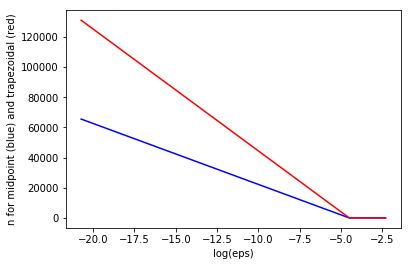

262144
[  1.00000000e-01   8.88888890e-02   7.77777780e-02   6.66666670e-02
   5.55555560e-02   4.44444450e-02   3.33333340e-02   2.22222230e-02
   1.11111120e-02   1.00000000e-09]


In [19]:
# Ej 3.9

from numpy import linspace, zeros, sqrt, log

def adaptive_integration(f, a, b, eps, method='midpoint'):
    n_limit = 1000000   # Just a choice (used to avoid inf loop)
    n = 2    
    if method == 'trapezoidal':
        integral_n  = trapezoidal(f, a, b, n)
        integral_2n = trapezoidal(f, a, b, 2*n)
        diff = abs(integral_2n - integral_n)
        print('trapezoidal diff: ', diff)     
        while (diff > eps) and (n < n_limit):
            integral_n  = trapezoidal(f, a, b, n)
            integral_2n = trapezoidal(f, a, b, 2*n)
            diff = abs(integral_2n - integral_n)
            print('trapezoidal diff: ', diff)
            n *= 2
    elif method == 'midpoint':
        integral_n  = midpoint(f, a, b, n)
        integral_2n = midpoint(f, a, b, 2*n)
        diff = abs(integral_2n - integral_n)
        print('midpoint diff: ', diff)
        while (diff > eps) and (n < n_limit):
            integral_n  = midpoint(f, a, b, n)
            integral_2n = midpoint(f, a, b, 2*n)
            diff = abs(integral_2n - integral_n)
            print('midpoint diff: ', diff)
            n *= 2
    else:
        print('Error - adaptive integration called with unknown par')
    # Now we check if acceptable n was found or not
    if diff <= eps:   # Success
        print('The integral computes to: ', integral_2n)
        return n  
    else:
        return -n   # Return negative n to tell "not found"

def application():
    """...Tasks b) and c)"""
    
    def f(x):
        return x**2
    def g(x):
        return sqrt(x)
        
    #eps = 1E-1           # Just switch between these two eps values
    eps = 1E-10
    #a = 0.0
    a = 0.0 + 0.01;       # If we adjust a, sqrt(x) is handled easily
    b = 2.0
    # ...f
    n = adaptive_integration(f, a, b, eps, 'midpoint')
    if n > 0:   
        print('Sufficient n is: %d' % (n))
    else:
        print('No n was found in %d iterations' % (n_limit))
        
    n = adaptive_integration(f, a, b, eps, 'trapezoidal')
    if n > 0:   
        print('Sufficient n is: %d' % (n))
    else:
        print('No n was found in %d iterations' % (n_limit))
    
    # ...g
    n = adaptive_integration(g, a, b, eps, 'midpoint')
    if n > 0:   
        print('Sufficient n is: %d' % (n))
    else:
        print('No n was found in %d iterations' % (n_limit))
    
    n = adaptive_integration(g, a, b, eps, 'trapezoidal')
    if n > 0:   
        print('Sufficient n is: %d' % (n))
    else:
        print('No n was found in %d iterations' % (n_limit))
    
    # Task c, make plot for both midpoint and trapezoidal
    eps = linspace(1E-1,10E-10,10)
    n_m = zeros(len(eps))
    n_t = zeros(len(eps))
    for i in range(len(n_m)):
        n_m[i] = adaptive_integration(g, a, b, eps[i], 'midpoint')
        n_t[i] = adaptive_integration(g, a, b, eps[i], 'trapezoidal')   

    import matplotlib.pyplot as plt
    plt.plot(log(eps),n_m,'b-',log(eps),n_t,'r-')
    plt.xlabel('log(eps)')
    plt.ylabel('n for midpoint (blue) and trapezoidal (red)')
    plt.show()
    print(n)
    print(eps)
    
application()

In [22]:
# Ej 3.10

def f(x):
    return x**x
    
eps = 1E-4
a = 0.0;  b = 2.0

# Choose midpoint method
n = adaptive_integration(f, a, b, eps, 'midpoint')
if n > 0:   
    print('Sufficient n is: %d' % (n))
else:
    # The negative n is returned to signal that the upper limit of n 
    # was passed
    print('No n was found in %d iterations' % (abs(n)))

midpoint diff:  0.204482736735
midpoint diff:  0.204482736735
midpoint diff:  0.0614624741276
midpoint diff:  0.0172422876097
midpoint diff:  0.00472227462487
midpoint diff:  0.00127679998857
midpoint diff:  0.000342184766966
midpoint diff:  9.11134509076e-05
The integral computes to:  2.83384395958
Sufficient n is: 256


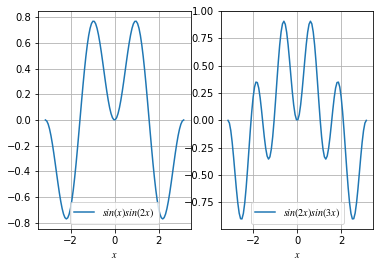

Trapezoidal rule for sin(1x)*sin(1x) = 3.14159
Trapezoidal rule for sin(1x)*sin(2x) = 0.00000
Trapezoidal rule for sin(1x)*sin(3x) = -0.00000
Trapezoidal rule for sin(1x)*sin(4x) = -0.00000
Trapezoidal rule for sin(1x)*sin(5x) = -0.00000
Trapezoidal rule for sin(1x)*sin(6x) = 0.00000
Trapezoidal rule for sin(1x)*sin(7x) = -0.00000
Trapezoidal rule for sin(1x)*sin(8x) = -0.00000
Trapezoidal rule for sin(1x)*sin(9x) = -0.00000
Trapezoidal rule for sin(1x)*sin(10x) = -0.00000
Trapezoidal rule for sin(2x)*sin(1x) = 0.00000
Trapezoidal rule for sin(2x)*sin(2x) = 3.14159
Trapezoidal rule for sin(2x)*sin(3x) = -0.00000
Trapezoidal rule for sin(2x)*sin(4x) = 0.00000
Trapezoidal rule for sin(2x)*sin(5x) = -0.00000
Trapezoidal rule for sin(2x)*sin(6x) = 0.00000
Trapezoidal rule for sin(2x)*sin(7x) = -0.00000
Trapezoidal rule for sin(2x)*sin(8x) = 0.00000
Trapezoidal rule for sin(2x)*sin(9x) = -0.00000
Trapezoidal rule for sin(2x)*sin(10x) = 0.00000
Trapezoidal rule for sin(3x)*sin(1x) = -0.00000

In [50]:
# Ej 3.11

import numpy as np
import matplotlib.pyplot as plt


I = lambda j, k, x: np.sin(j*x)*np.sin(k*x)

x = np.linspace(-np.pi, np.pi, 100)

plt.figure()
plt.subplot(1,2,1)
plt.plot(x, I(1, 2, x), label = r'$sin(x)sin(2x)$')
plt.xlabel(r'$x$')
plt.legend(loc = 'best')
plt.grid()
plt.subplot(1,2,2)
plt.plot(x, I(2, 3, x), label = r'$sin(2x)sin(3x)$')
plt.xlabel(r'$x$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

x = np.linspace(0,10, 100)

for j in range(1,11):
    for k in range(1,11):
        f = lambda x: I(j, k, x)
        r = trapezoidal(f, -np.pi, np.pi, 100)
        print('Trapezoidal rule for sin({j:d}x)*sin({k:d}x) = {r:.5f}'.format( j = j, k = k, r = r))

In [52]:
# Ej 3.12

from numpy import linspace, zeros, pi, sin, exp

def integrate_coeffs(f, N, M):
    b = zeros(N)
    left_end = -pi; right_end = pi
    for n in range(1, N+1):
        f_sin = lambda t: f(t)*sin(n*t)      
        b[n-1] = (1/pi)*trapezoidal(f_sin, left_end, right_end, M)
    return b
    
def test_integrate_coeffs():
    """Check that sin(nt) are integrated exactly by trapezoidal"""
    def f(t):
        return 1
    tol = 1E-14
    N = 10
    M = 100
    b = integrate_coeffs(f, N, M)
    print(b)
    for i in range(0, 10):
        err = abs(b[i])  # Supposed to be zero
        assert err < tol, 'n = %d, err = %g' % (n,err)

def plot_approx(f, N, M, filename):
    def S_N(b,t):
        sum = 0
        for i in range(len(b)):
            sum += b[i]*sin((i+1)*t)
        return sum        
    left_end = -pi;  right_end = pi
    time = linspace(-pi, pi, 100)
    y = f(time)
    b = integrate_coeffs(f, N, M)
    y_approx = S_N(b, time)

    import matplotlib.pyplot as plt
    plt.figure(); plt.plot(time, y, 'k-', time, y_approx, 'k--')
    plt.xlabel('t');  plt.ylabel('f (solid) and S (dashed)')
    plt.savefig(filename)

def application():
    def f(t):
        return (1/pi)*t
    N = 3
    M = 100
    b = integrate_coeffs(f, N, M)
    print(b)
    for N in [3, 6, 12, 24]:
        plot_filename = '/Users/ignacio/Desktop/' \
                                              + str(N) + '.pdf'
        plot_approx(f, N, M, plot_filename)
    def g(t):
        return exp(-(t-pi))
    plot_filename = '/Users/ignacio/Desktop/' \
                                              + str(100) + '.pdf'
    plot_approx(g, 100, M, plot_filename)
    
application()
test_integrate_coeffs()

[ 0.63641032 -0.3178909   0.2115779 ]
[ -1.97551669e-17  -2.65479362e-17   7.72919313e-17  -9.58394588e-17
   1.82110591e-16   2.63824903e-17  -2.25993787e-16  -5.29010395e-17
   1.37506837e-16  -5.97368017e-16]


In [53]:
# Ej 3.13

def trapezoidal_double(f, a, b, c, d, nx, ny):
    hx = (b - a)/float(nx)
    hy = (d - c)/float(ny)
    I = 0.25*(f(a, c) + f(a, d) + f(b, c) + f(b, d))
    Ix = 0
    for i in range(1, nx):
        xi = a + i*hx
        Ix += f(xi, c) + f(xi, d)
    I += 0.5*Ix
    Iy = 0
    for j in range(1, ny):
        yj = c + j*hy
        Iy += f(a, yj) + f(b, yj)
    I += 0.5*Iy
    Ixy = 0
    for i in range(1, nx):
        for j in range(1, ny):
            xi = a + i*hx
            yj = c + j*hy
            Ixy += f(xi, yj)
    I += Ixy
    I *= hx*hy
    return I

def test_trapezoidal_double():
    """Test that a linear function is integrated exactly."""
    def f(x, y):
        return 2*x + y

    a = 0;  b = 2;  c = 2;  d = 3
    import sympy
    x, y = sympy.symbols('x  y')
    I_expected = sympy.integrate(f(x, y), (x, a, b), (y, c, d))
    # Test three cases: nx < ny, nx = ny, nx > ny
    for nx, ny in (3, 5), (4, 4), (5, 3):
        I_computed = trapezoidal_double(f, a, b, c, d, nx, ny)
        tol = 1E-14
        #print I_expected, I_computed
        assert abs(I_computed - I_expected) < tol

test_trapezoidal_double()

In [55]:
# Ej 3.14

import numpy as np

def MonteCarlo_double(f, g, x0, x1, y0, y1, n):
    """
    Monte Carlo integration of f over a domain g>=0, embedded
    in a rectangle [x0,x1]x[y0,y1]. n^2 is the number of
    random points.
    """
    # Draw n**2 random points in the rectangle
    x = np.random.uniform(x0, x1, n)
    y = np.random.uniform(y0, y1, n)
    # Compute sum of f values inside the integration domain
    f_mean = 0
    num_inside = 0   # number of x,y points inside domain (g>=0)
    for i in range(len(x)):
        for j in range(len(y)):
            if g(x[i], y[j]) >= 0:
                num_inside += 1
                f_mean += f(x[i], y[j])
    f_mean = f_mean/float(num_inside)
    area = num_inside/float(n**2)*(x1 - x0)*(y1 - y0)
    return area*f_mean

def g(x, y):
    """Utilize that triangle is symmetric about y-axis """
    return (1 if (0 <= y <= -3*abs(x) + 3) else -1 )

print(MonteCarlo_double(lambda x, y: 1, g, -1, 1, 0, 3, 1000))

3.1279079999999997
